In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_bank=pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=";")

In [3]:
df_bank.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df_bank['target'] = df_bank['y'].map({'no': 0, 'yes':1})
df_bank.head()
df_bank.drop(['y'],axis=1, inplace=True)

In [37]:
df_bank.columns = df_bank.columns.str.replace('.', '_')
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target'],
      dtype='object')

#### Baseline Model

In [7]:
df_bank['target'].value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report


## Logistic Regression Classifier
def implement_lr(df, numf, catf, test_size=0.000001, cw = None, rs=123):

    fdrop = [col for col in df.columns if col not in numf + catf + ['target']]
    df = df.drop(fdrop, axis=1)

    df1 = pd.get_dummies(df, columns=catf)

    X_train, X_test, y_train, y_test = train_test_split(df1.drop('target', axis=1), 
                                                        df1['target'], 
                                                        test_size=test_size, 
                                                        random_state=rs)
    
    
    # Instantiate logistic regression model
    logreg = LogisticRegression(class_weight=cw)

    # Fit the model on the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logreg.predict(X_train)

    # calculate the accuracy score
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print the confusion matrix and classification report
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    return logreg

## SVM CLassifier
def implement_svm(df, numf, catf, test_size=0.000001, rs = 123):

    fdrop = [col for col in df.columns if col not in numf + catf + ['target']]
    df = df.drop(fdrop, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                        df['target'], 
                                                        test_size=test_size, 
                                                        random_state=rs)

    # create the transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numf),
        ('cat', categorical_transformer, catf)
    ])

    clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf'))
    ])

    # fit the classifier to the training data
    clf.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = clf.predict(X_train)

    # calculate the accuracy score
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print the confusion matrix and classification report
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    return clf

## Decision Tree Classifier
def implement_dt(df, numf, catf, test_size = 0.000001, rs=123):

    fdrop = [col for col in df.columns if col not in numf + catf + ['target']]
    df = df.drop(fdrop, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                        df['target'], 
                                                        test_size=test_size, 
                                                        random_state=rs)
    
    
    for col in catf:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    # Train random forest classifier
    dtc = DecisionTreeClassifier(random_state=rs)
    dtc.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = dtc.predict(X_train)

    # calculate the accuracy score
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print the confusion matrix and classification report
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    return dtc

## Random Forest Classifier
def implement_rf(df, numf, catf, test_size = 0.000001, nest=100, rs=123):

    fdrop = [col for col in df.columns if col not in numf + catf + ['target']]
    df = df.drop(fdrop, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                        df['target'], 
                                                        test_size=test_size, 
                                                        random_state=rs)
    
    
    for col in catf:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    # Train random forest classifier
    rfc = RandomForestClassifier(n_estimators=nest, random_state=rs)
    rfc.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = rfc.predict(X_train)

    # calculate the accuracy score
    accuracy = rfc.score(X_train, y_train)
    print(f'Accuracy: {accuracy}')

    # Print the confusion matrix and classification report
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    return rfc

In [31]:
df_bank['target'].value_counts()

0    36548
1     4640
Name: target, dtype: int64

### 1.1 LR model

In [32]:
num_var = ['age','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [35]:
logreg = implement_lr(df_bank, num_var, cat_var)

Accuracy: 0.9001141136766455
[[35995   552]
 [ 3562  1078]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     36547
           1       0.66      0.23      0.34      4640

    accuracy                           0.90     41187
   macro avg       0.79      0.61      0.64     41187
weighted avg       0.88      0.90      0.88     41187



### 1.2 LR with balanced class weight

In [36]:
logreg = implement_lr(df_bank, num_var, cat_var, cw='balanced')

Accuracy: 0.8093330419792653
[[30354  6193]
 [ 1660  2980]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     36547
           1       0.32      0.64      0.43      4640

    accuracy                           0.81     41187
   macro avg       0.64      0.74      0.66     41187
weighted avg       0.88      0.81      0.83     41187



### 1.3 SVM

In [45]:
svm_mod = implement_svm(df_bank, num_var, cat_var)

Accuracy: 0.9040231140893972
[[35964   583]
 [ 3370  1270]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     36547
           1       0.69      0.27      0.39      4640

    accuracy                           0.90     41187
   macro avg       0.80      0.63      0.67     41187
weighted avg       0.89      0.90      0.89     41187



### 1.4 Decision Tree

In [37]:
dtc = implement_dt(df_bank, num_var, cat_var)

Accuracy: 0.987617452108675
[[36523    24]
 [  486  4154]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36547
           1       0.99      0.90      0.94      4640

    accuracy                           0.99     41187
   macro avg       0.99      0.95      0.97     41187
weighted avg       0.99      0.99      0.99     41187



### 1.5 Random Forest


In [38]:
rfc = implement_rf(df_bank, num_var, cat_var, nest = 200)

Accuracy: 0.987617452108675
[[36473    74]
 [  436  4204]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36547
           1       0.98      0.91      0.94      4640

    accuracy                           0.99     41187
   macro avg       0.99      0.95      0.97     41187
weighted avg       0.99      0.99      0.99     41187



In [39]:
importance = rfc.feature_importances_
feature_names = df_bank.columns

# Print feature importance with feature names
for feature_name, importance_score in zip(feature_names, importance):
    print(feature_name,' - ', importance_score)

age  -  0.22333353684413154
job  -  0.09476251067692963
marital  -  0.044523810151187664
education  -  0.08312891327835972
default  -  0.01544072661018772
housing  -  0.04228049403783671
loan  -  0.028683600951389155
contact  -  0.015637770164947266
month  -  0.018328861903530294
day_of_week  -  0.06389683788736679
duration  -  0.03955200261973542
campaign  -  0.01823494824023472
pdays  -  0.03647692678387335
previous  -  0.023561201409371887
poutcome  -  0.020718320196616933
emp.var.rate  -  0.025245515429176493
cons.price.idx  -  0.15222184511859996
cons.conf.idx  -  0.05397217769652479


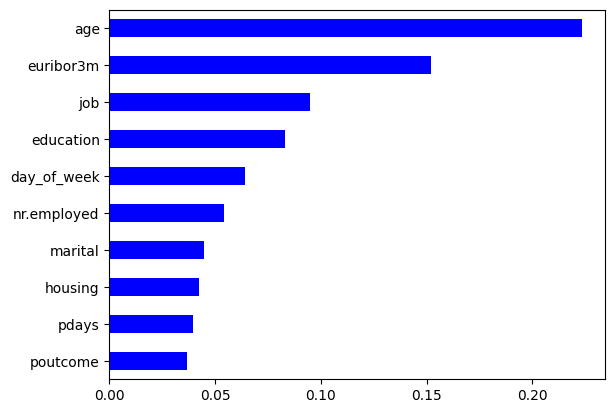

In [49]:
fdrop = [col for col in df_bank.columns if col not in num_var + cat_var]
df_tmp = df_bank.drop(fdrop, axis=1)

importances_rf = pd.Series(rfc.feature_importances_, index = df_tmp.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf[-10:].plot(kind='barh', color='blue')
plt.show()

### Feature Engineering

In [72]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFECV

def select_features(df, target_col, method='univariate', k=10, n_features_to_select=10):
    """
    Select important features for binary classification with both numerical and categorical variables.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target column.
        method (str): The feature selection method to use. Can be 'univariate' or 'recursive'.
        k (int): The number of top features to select in the univariate method.
        n_features_to_select (int): The number of features to select in the recursive method.

    Returns:
        tuple: List of selected feature names.
    """

    # Split data into X and y
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Encode categorical variables
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if method == 'univariate':
        # Univariate feature selection
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X_train, y_train)

        # Get selected features
        selected_cols = X_train.columns[selector.get_support()].tolist()

    elif method == 'recursive':
        # Recursive feature elimination with cross-validation
        estimator = DecisionTreeClassifier(random_state=42)
        selector = RFECV(estimator, step=1, cv=5, n_jobs=-1, scoring='precision', min_features_to_select=n_features_to_select)
        selector.fit(X_train, y_train)

        # Get selected features
        selected_cols = X_train.columns[selector.support_].tolist()

    else:
        raise ValueError("Invalid method. Must be 'univariate' or 'recursive'.")

    return selected_cols

In [68]:
df_bank1 = df_bank.drop(['duration'], axis=1)
select_features(df_bank1, 'target','univariate', k=7, n_features_to_select=5)


['contact',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed']

In [76]:
select_features(df_bank1, 'target','recursive', k=10, n_features_to_select=7)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [78]:
num_var = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
cat_var = ['job','education','contact','month','day_of_week','loan','housing','default','poutcome']

logreg_v1 = implement_lr(df_bank, num_var, cat_var, cw='balanced')

Accuracy: 0.7980092255401796
[[5949 1349]
 [ 315  625]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7298
           1       0.32      0.66      0.43       940

    accuracy                           0.80      8238
   macro avg       0.63      0.74      0.65      8238
weighted avg       0.88      0.80      0.83      8238



## 2. Divide into new vs old customer - Only 1500 old customers

In [40]:
df_bank_new = df_bank[df_bank['previous'] == 0]
df_bank_old = df_bank[df_bank['previous'] != 0]

In [9]:
df_bank_new['target'].value_counts()

0    32422
1     3141
Name: target, dtype: int64

In [10]:
df_bank_old['target'].value_counts()

0    4126
1    1499
Name: target, dtype: int64

### New

In [53]:
num_var = ['age','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
cat_var = ['job','education','contact','month','day_of_week','loan','housing','default','poutcome']

In [41]:
implement_lr(df_bank_new, num_var, cat_var, cw='balanced')

Accuracy: 0.7857263371014004
[[26138  6283]
 [ 1337  1804]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     32421
           1       0.22      0.57      0.32      3141

    accuracy                           0.79     35562
   macro avg       0.59      0.69      0.60     35562
weighted avg       0.89      0.79      0.82     35562



LogisticRegression(class_weight='balanced')

In [42]:
implement_dt(df_bank_new, num_var, cat_var)

Accuracy: 0.9862493673021765
[[32397    24]
 [  465  2676]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32421
           1       0.99      0.85      0.92      3141

    accuracy                           0.99     35562
   macro avg       0.99      0.93      0.95     35562
weighted avg       0.99      0.99      0.99     35562



DecisionTreeClassifier(random_state=123)

In [29]:
implement_svm(df_bank_new, num_var, cat_var)

Accuracy: 0.9112891888092226
Confusion Matrix: 
[[6416   48]
 [ 583   66]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6464
           1       0.58      0.10      0.17       649

    accuracy                           0.91      7113
   macro avg       0.75      0.55      0.56      7113
weighted avg       0.89      0.91      0.88      7113



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['job', 'education',
                                                   'contact', 'month',
                                                   'day_of_week', 'loan',
                                                   'housing', 'default',
                                                   'poutcome'])])),
                ('classifier', SVC())])

In [55]:
rfc = implement_rf(df_bank_new, num_var, cat_var)

Accuracy: 0.9828749789100726
[[32330    91]
 [  518  2623]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32421
           1       0.97      0.84      0.90      3141

    accuracy                           0.98     35562
   macro avg       0.98      0.92      0.94     35562
weighted avg       0.98      0.98      0.98     35562



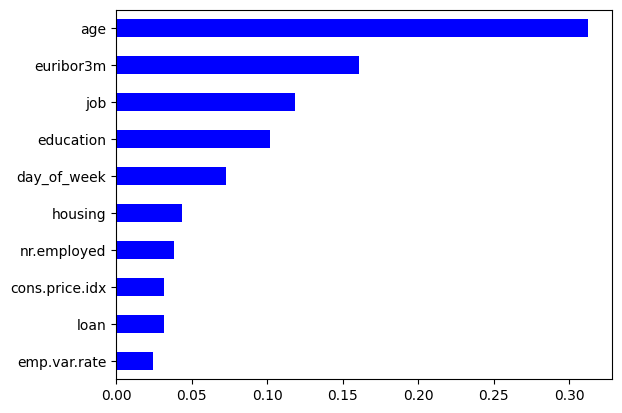

In [56]:
fdrop = [col for col in df_bank_new.columns if col not in num_var + cat_var]
df_tmp = df_bank_new.drop(fdrop, axis=1)

importances_rf = pd.Series(rfc.feature_importances_, index = df_tmp.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf[-10:].plot(kind='barh', color='blue')
plt.show()

### Old

In [44]:
implement_lr(df_bank_old, num_var, cat_var)

Accuracy: 0.8237908961593172
[[3761  364]
 [ 627  872]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4125
           1       0.71      0.58      0.64      1499

    accuracy                           0.82      5624
   macro avg       0.78      0.75      0.76      5624
weighted avg       0.82      0.82      0.82      5624



LogisticRegression()

In [43]:
implement_dt(df_bank_old, num_var, cat_var)

Accuracy: 0.9962660028449503
[[4125    0]
 [  21 1478]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4125
           1       1.00      0.99      0.99      1499

    accuracy                           1.00      5624
   macro avg       1.00      0.99      1.00      5624
weighted avg       1.00      1.00      1.00      5624



DecisionTreeClassifier(random_state=123)

In [18]:
implement_rf(df_bank_old, num_var, cat_var)

Accuracy: 0.8204444444444444
[[748  93]
 [109 175]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       841
           1       0.65      0.62      0.63       284

    accuracy                           0.82      1125
   macro avg       0.76      0.75      0.76      1125
weighted avg       0.82      0.82      0.82      1125



RandomForestClassifier(random_state=123)

## 3 . Trying to clean some data

* 1. Remove Marital category with unknown rows
* 2. Remove education category with illiterate
* 3. Remove unknown rows for housing, loan
* 4. 

In [21]:
df_bank1 = df_bank[(df_bank != 'unknown').all(axis=1)]
df_bank2 = df_bank1[(df_bank1 != 'illiterate').all(axis=1)]
df_bank2['target'].value_counts()

0    26621
1     3856
Name: target, dtype: int64

In [22]:
## LR on new data

implement_lr(df_bank2, num_var, cat_var, cw='balanced')

Accuracy: 0.8088910761154856
[[4435  905]
 [ 260  496]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5340
           1       0.35      0.66      0.46       756

    accuracy                           0.81      6096
   macro avg       0.65      0.74      0.67      6096
weighted avg       0.87      0.81      0.83      6096



LogisticRegression(class_weight='balanced')

In [87]:
implement_dt(df_bank2, num_var, cat_var)

[[4796  544]
 [ 512  244]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5340
           1       0.31      0.32      0.32       756

    accuracy                           0.83      6096
   macro avg       0.61      0.61      0.61      6096
weighted avg       0.83      0.83      0.83      6096



DecisionTreeClassifier(random_state=123)

In [72]:
df_bank.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [75]:
print(df_bank['housing_mod'].value_counts())
df_bank['housing_mod']=df_bank['housing'].apply(lambda x: 'no' if x=='unknown' else x)
df_bank.head()

yes    21576
no     19612
Name: housing_mod, dtype: int64


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,housing_mod
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,yes
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no


In [80]:
print(df_bank['loan_mod'].value_counts())
df_bank['loan_mod']=df_bank['loan'].apply(lambda x: 'no' if x=='unknown' else x)
df_bank.head()

no     34940
yes     6248
Name: loan_mod, dtype: int64


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,housing_mod,loan_mod
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,yes,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,yes


In [83]:
print(df_bank['job_mod'].value_counts())
df_bank['job_mod']=df_bank['job'].apply(lambda x: 'unemployed' if x=='unknown' else x)
df_bank.head()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
unemployed        1344
housemaid         1060
student            875
Name: job_mod, dtype: int64


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,housing_mod,loan_mod,job_mod
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no,housemaid
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no,services
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,yes,no,services
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,no,admin.
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no,yes,services


In [89]:
print(df_bank['education'].value_counts())
df_bank['education_mod']=df_bank['education'].map({'university.degree':'university_graduate','high.school':'school_passout','basic.9y':'school_dropout','basic.4y':'school_dropout','basic.6y':'school_dropout','professional.course':'advanced_degree','unknown':'unknown','illiterate':'unknown'})
df_bank.head()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,housing_mod,loan_mod,job_mod,education_mod
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,1.1,93.994,-36.4,4.857,5191.0,0,no,no,housemaid,school_dropout
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,1.1,93.994,-36.4,4.857,5191.0,0,no,no,services,school_passout
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,1.1,93.994,-36.4,4.857,5191.0,0,yes,no,services,school_passout
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,1.1,93.994,-36.4,4.857,5191.0,0,no,no,admin.,school_dropout
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,1.1,93.994,-36.4,4.857,5191.0,0,no,yes,services,school_passout


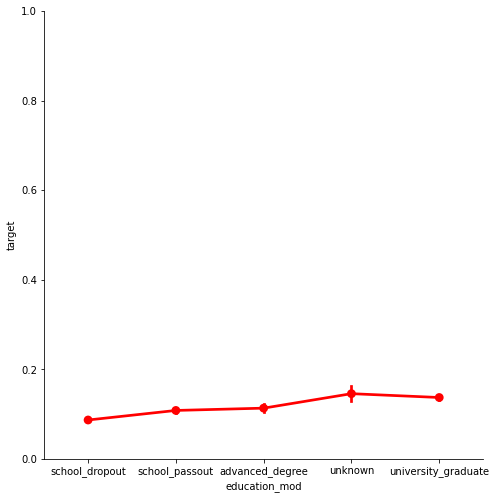

In [91]:
h = sns.PairGrid(data=df_bank, x_vars=['education_mod'], y_vars='target', size=7)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [92]:
print(df_bank['contact'].value_counts())
#df_bank['job_mod']=df_bank['job'].apply(lambda x: 'unemployed' if x=='unknown' else x)
#df_bank.head()

cellular     26144
telephone    15044
Name: contact, dtype: int64
